# 1.2 Causal Effects and Idealized Experiments

## Estimation of Causal Effects 

One way to measure a causal effect is to conduct an experiment. ... This is an example of a randomized controlled experiment. It is controlled in the sense that there are both a control group that receives no treatment (no fertilizer) and a treatment group that receives the treatment. 

It is randomized in the sense that the treatment is assigned randomly. This random assignment eliminates (or minimizes) the possibility of a systematic relationship between for example, how sunny the plot is and whether it receives fertilizer so that the only systematic difference between the treatment and control groups is the treatment. 

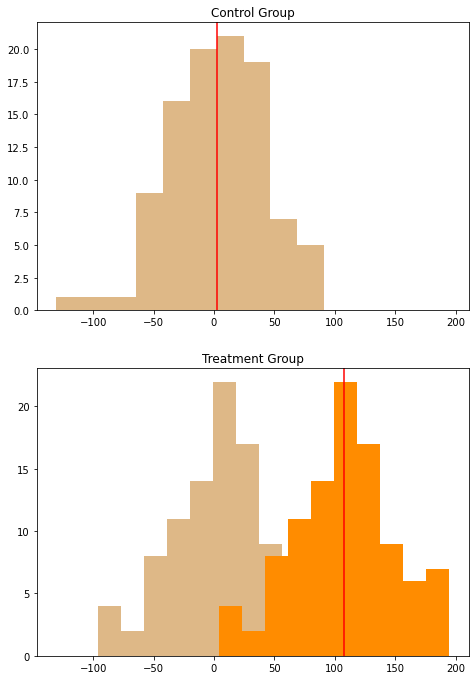

In [10]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

control_group = np.random.normal(10,40,100)
treatment_group = np.random.normal(10,40,100)

treatment_group_at = treatment_group + 100

fig = plt.figure()

ax_1 = fig.add_axes([0,2,1,1])
ax_1.hist(control_group, bins=10, color='burlywood')
ax_1.axvline(np.mean(control_group), color='red')
ax_1.set_title('Control Group')



ax_2 = fig.add_axes([0,0.8,1,1], sharex = ax_1)
ax_2.hist(treatment_group, bins=10, color='burlywood')
ax_2.hist(treatment_group_at, bins=10, color='darkorange')
ax_2.axvline(np.mean(treatment_group_at), color='red')
ax_2.set_title('Treatment Group')


plt.show()

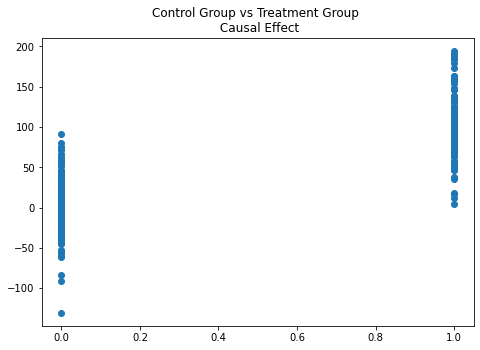

In [11]:
df_control = pd.DataFrame({"y":control_group, "x":0})
df_treatment = pd.DataFrame({"y":treatment_group_at, "x":1})
df = pd.concat([df_control, df_treatment])

fig = plt.figure()

ax_1 = fig.add_axes([0,0,1,1])
ax_1.scatter('x','y', data=df)
#ax_1.axvline(np.mean(control_group), color='red')
ax_1.set_title('Control Group vs Treatment Group \n Causal Effect')


plt.show()

#### Importance of randomization

We are comparing the control group and the treatment group. 

But say one or the both was not randomized. For example, the control group was not randomized. Then the mean of it would be formed around say 50. Then the true causal effect would not be biased. 

# 1.3 Data: Sources and Types

In econometrics, data come from one of two sources: experiments or nonexperimental observations of the world. 


## Experimental vs. Observational Data

**Experimental data** come from experiments designed to evaluate a treatment or policy or to investigate a causal effect. 

ex) Chapter 13, thousands of students were randomly assigned to classes of different sizes for several years and were given annual standardized tests. 

Because real-world experiments with human subjects are difficult to administer and to control, they have flaws relative to ideal randomized controlled experiments. **(so it means, it still has a problem with perfectly randomizing).**

Data obtained by observing actual behavior outside an experimental setting are called **observational data.** Observational data are collected using surveys, such as a telephone survey of consumers, and administrative records, such as historical records on mortgage applications maintained by lending institutions. 

Observational data pose major challenges to econometrics attempts to estimate causal effects, and the tools of econometrics to tackle these challenges. In the real world, levels of "treatment" are not assigned at random, so it is difficult to sort out the effect of the "treatment" from other relevant factors. Much of econometircs is devoted to methods for meeting the challenges encountered when real-world data are used to estimate causal effects. 


## Three Types (cross sectional vs time series vs panel)

Whether the data are experimental or observational, data sets come in three main types: **cross-sectional data, time series data, and panel data.** 

### Cross-Sectional Data

Data on different entities for a single time period are called cross-sectional data. 


### Time Series Data

Time series data are data for a single entity collected at multiple time periods. 


### Panel Data 

Panel data are data for multiple entities in which each entity is observed at two or more periods. 

# Chapter 4: Linear Regression with One Regressor

### 4.2 Estimating the Coefficients of the Linear Regression Model 

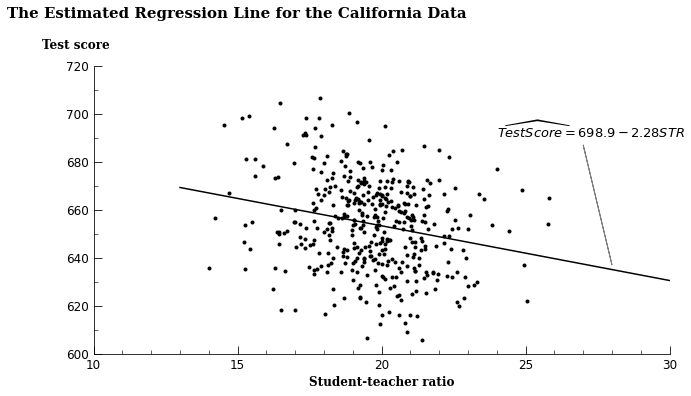

In [12]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression

df = pd.read_csv('CASchools.csv')
df["score"] = (df["read"] + df["math"]) / 2 
df['stratio'] = df['students'] / df['teachers']

x = np.array(df["stratio"]).reshape(-1,1)
y = np.array(df["score"]).reshape(-1,1)

reg  = LinearRegression().fit(x,y)

from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

fig = plt.figure(figsize=(8,4))

ax = fig.add_axes([0, 0, 1, 1])
ax.scatter("stratio", "score", data=df, color='black', marker='.')
ax.set_ylim(600, 720)
ax.set_xlim(10, 30)
ax.set_xlabel('Student-teacher ratio', fontsize='large', fontfamily='serif', fontweight='bold')
ax.text(8.2,727,'Test score', fontsize='large', fontfamily='serif', ma='center', fontweight='bold')


ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_minor_locator(MultipleLocator(1))

ax.yaxis.set_major_locator(MultipleLocator(20))
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.yaxis.set_minor_locator(MultipleLocator(10))


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(axis='x', which="major", direction='in', pad=5, length=8, labelsize=12)
ax.tick_params(axis='x', which="minor", direction='in', length=4, labelsize=12)

ax.tick_params(axis='y', which="major", direction='in', pad=5, length=8, labelsize=12)
ax.tick_params(axis='y', which="minor", direction='in', length=4, labelsize=12)


m = reg.intercept_
b = reg.coef_
x = np.arange(13,30,0.01).reshape(-1,1)

ax.plot(x, m+(b*x), color='black')

ax.text(7, 740, 'The Estimated Regression Line for the California Data', fontsize=15, fontfamily='serif', ma='center', fontweight='bold')


ax.arrow(28, 637, -1, 50, alpha=0.5)
ax.text(24, 690, r'$\widehat{TestScore}=698.9-2.28STR$', fontsize=13)

plt.show()

In [26]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

results = smf.ols('score ~ stratio', data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     22.58
Date:                Sun, 07 Feb 2021   Prob (F-statistic):           2.78e-06
Time:                        18:55:43   Log-Likelihood:                -1822.2
No. Observations:                 420   AIC:                             3648.
Df Residuals:                     418   BIC:                             3657.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    698.9329      9.467     73.825      0.0

# Chapter 5: Regression with a Single Regressor: Hypothesis Tests and Confidence Intervals 

### 5.4 Heteroskedasticity and Homoskedasticity 

Our only assumption about the distribution of $u_i$ conditional on $X_i$ is that it has a mean of zero (the first least squares assumption). If, furthermore, the variance of this conditional distribution does not depend on $X_i$, then the errors are said to be homoskedastic. This section discusses homoskedasticity, its theoretical implications, the simplified formulas for the standard errors of the OLS estimators that arise if the errors are homoskedastic, and the risks you run if you use these simplified formulas in practice. 

The error term, $u_i$ is **homoskedastic** if the variance of the conditional distribution of $u_i$ given $X_i$ is constant for i = 1,....,n and in particular does not depend on $X_i$. Otherwise, the error term is **Heteroskedastic**. 

# Chapter 6: Linear Regression with Multiple Regressors

This chapter explains this "omitted variable bias" and introduces multiple regression, a method that can eliminate omitted variable bias. The key idea of multiple regression is that if we have data on these omitted variables, then we can include them as additional regressors and thereby estimate the effect of one regressor (the student-teacher ratio) while holding constant the other variables (such as student characteristics). 

### 6.1 Omitted Variable Bias 

By focusing only on the student-teacher ratio, the empirical analysis in Chapters 4 and 5 ignored some potentially important determinants of test scores by collecting their influences in the regression error term. These omitted factors include school characteristics, such as teacher quality and computer usage, and student characteristics, such as family background. We begin by considering an omitted students characteristics that is particularly relevant in California because of its large immigrant population: the prevalence in the school district of students who are still learning English. 

By ignoring the percentage of English learners in the district, the OLS estimator of the slope in the regression of test scores on the student-teacher ratio could be biased; that is, the mean of the sampling distribution of the OLS estimator might not equal the true effect on test scores of a unit chnage in the student-teacher ratio.

Students who are still learning English might perform worse on standardized tests than native English speakers. If districts with large classes also have many students still learning English, then the OLS regression of test scores on the student-teacher ratio could erroneously find a correlation and produce a large estimated coefficient, when in fact the true causal effect of cutting class sizes on test scores is small, even zero. 

A look at the California data lends credence to this concern. The correlation between the student-teacher ratio and the percentage of English learners (students who are not native English speakers and who have not yet mastered English) in the district is 0.19. This small but positive correlation suggests that districts with more English learners tend to have a higher student-teacher ratio (larger classes). 

Because the student-teacher ratio and the percentage of English learners are correlated, it is possible that the OLS coefficient in the regression of test scores on the student-teacher ratio reflects taht influence.

### Correlations between STRatio and all the other variables 

In [25]:
print(df.corr()["stratio"])

district      -0.058951
students       0.298481
teachers       0.264641
calworks       0.018276
lunch          0.135203
computer       0.233826
expenditure   -0.619982
income        -0.232194
english        0.187642
read          -0.246593
math          -0.195553
score         -0.226363
stratio        1.000000
Name: stratio, dtype: float64


### Definition of Omitted Variable Bias 

If the regressor (the student-teacher ratio) is correlated with a variable that has been omitted from the analysis (the percentage of English learners) and that determines in part, the dependent variable (test scores), then the OLS estimator will have **omitted variable bias**.


### Omitted variable bias and the first least squares assumption 

Omitted variable bias means that the first least squares assumption - that $E[u_i|X_i] = 0$, as listed in Key Concept 4.3 - is incorrect. 

### Omitted Variable Simulation

$Y_i = \beta_0 + \beta_1X_{1i} + U_i$

$U_i = \beta_2X_{2i} + e_i$

$X_{2i} = \alpha X_{1i} + \lambda_i$

$E[e_i|X_{1i}, X_{2i}] = E[e_i|X_{1i}] = E[e_i|X_{2i}] = 0$

$E[\lambda_i|X_{1i}] = 0$


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     2579.
Date:                Mon, 08 Feb 2021   Prob (F-statistic):          6.36e-279
Time:                        16:04:20   Log-Likelihood:                -1496.9
No. Observations:                1000   AIC:                             2998.
Df Residuals:                     998   BIC:                             3008.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.9640      0.080    124.465      0.0

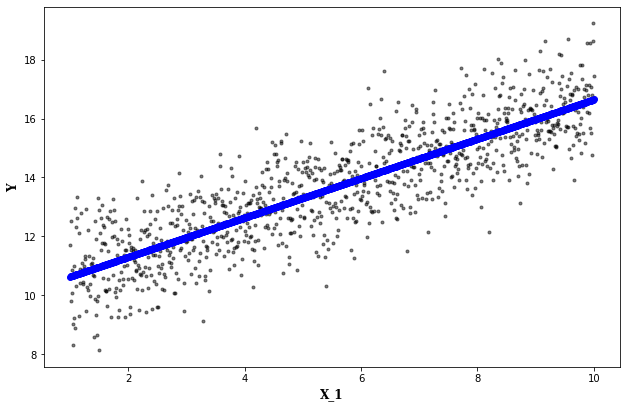

In [47]:
beta_0 = 10
beta_1 = 0.3 
beta_2 = 0.5
alpha = 0.7

lm = np.random.normal(loc=0, scale=1, size=1000)
e = np.random.normal(loc=0, scale=1, size=1000)

x_1 = np.linspace(start=1, stop=10, num=1000)
x_2 = alpha * x_1 + lm
u = beta_2 * x_2 + e

y = beta_0 + beta_1*x_1 + u

sm_df = pd.DataFrame({"Y":y, "X_1":x_1, "X_2":x_2})


fig = plt.figure(figsize=(8,5))

ax = fig.add_axes([0,0,1,1])

ax.scatter(x="X_1", y="Y", data=sm_df, marker=".", color='black', alpha=0.5)

ax.set_ylabel('Y', fontsize='large', fontfamily='serif', fontweight='bold')
ax.set_xlabel('X_1', fontsize='large', fontfamily='serif', fontweight='bold')

results = smf.ols('Y ~ X_1', data=sm_df).fit()
b_0 = results.params[0]
b_1 = results.params[1]

ax.plot(x_1, b_0 + b_1 * x_1, color="blue", marker='o')


print(results.summary())
plt.show()

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     1763.
Date:                Mon, 08 Feb 2021   Prob (F-statistic):               0.00
Time:                        17:05:21   Log-Likelihood:                -1379.1
No. Observations:                1000   AIC:                             2764.
Df Residuals:                     997   BIC:                             2779.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.9790      0.071    140.159      0.0

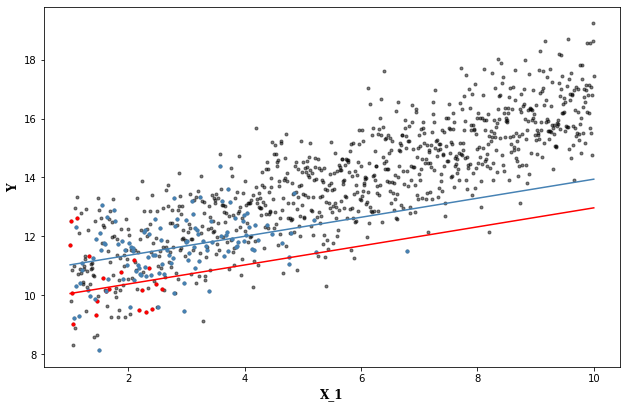

In [83]:
fig = plt.figure(figsize=(8,5))

ax = fig.add_axes([0,0,1,1])

ax.scatter(x="X_1", y="Y", data=sm_df, marker=".", color='black', alpha=0.5)
ax.scatter(x="X_1", y="Y", data=sm_df[(sm_df["X_2"]>=-1)&(sm_df["X_2"]<0)], marker=".", color='red')
ax.scatter(x="X_1", y="Y", data=sm_df[(sm_df["X_2"]>=1)&(sm_df["X_2"]<2)], marker=".", color='steelblue')


ax.set_ylabel('Y', fontsize='large', fontfamily='serif', fontweight='bold')
ax.set_xlabel('X_1', fontsize='large', fontfamily='serif', fontweight='bold')

results = smf.ols('Y ~ X_1 + X_2', data=sm_df).fit()
b_0 = results.params[0]
b_1 = results.params[1]
b_2 = results.params[2]

ax.plot(x_1, b_0 + b_1 * x_1 + b_2*(-0.5), color="red")
ax.plot(x_1, b_0 + b_1 * x_1 + b_2*(1.5), color="steelblue")


print(results.summary())
plt.show()

### 6.2 The Multiple Regression Model 

The multiple regrssion model extends the single variable regression model of Chapters 4 and 5 to inlcude additional variables as regressors. This model permits estimating the effect on $Y_i$ of changing one variable ($X_{1i}$) while holding the other regressors ($X_{2i}, X_{3i}$ and so forth) constant. 

The interpretation of the coefficient $\beta_1$ in Equation (6.2) is different than it was when $X_{1i}$ was the only regressor: In Equation (6.2), $\beta_1$ is the effect on Y of a unit change in $X_1$, holding $X_2$ constant or controlling for $X_2$.

Another phrase used to describe $\beta_1$ is the partial effect on Y of $X_1$, holding $X_2$ fixed.

### 6.3 The OLS Estimator in Mutiple Regression 

### Application to Test Scores and the Student-Teacher Ratio

In [30]:
results_2 = smf.ols('score ~ stratio + english', data=df).fit()
print(results_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     155.0
Date:                Sun, 07 Feb 2021   Prob (F-statistic):           4.62e-51
Time:                        19:02:59   Log-Likelihood:                -1716.6
No. Observations:                 420   AIC:                             3439.
Df Residuals:                     417   BIC:                             3451.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    686.0322      7.411     92.566      0.0

### 6.5 The Least Squares Assumptions in Multiple Regression 

**Assumption #1:** The Conditional Distribution of $U_i$ given $X_{1i}, X_{2i}, ..., X_{ki}$ Has a Mean Zero.

**Assumption #4:** No Perfect Multicollinearity


### 6.7 Multicollinearity

# Chapter 7: Hypothesis Tests and Confidence Intervals in Multiple Regression


### 7.1 Hypothesis Tests and Confidence Intervals for a Single Coefficient

This section describes how to compute the standard error, how to test hypothesis, and how to construct confidence intervals for a single coefficient in a multiple regression equation. 


### 7.2 Tests of Joint Hypothesis 

This section describes how to formulate joint hypothesis on multiple regression cofficients and how to test them unising an F-statistic. 



### 7.5 Model Specification for Multiple Regression

The job of determining which variables to include in multiple regression - that is, the problem of choosing specification - can be quite challenging, and no single rule applies in all situations. But do not despair, because some useful guidlines are available. 

The starting point for choosing a regression specification is thinking through the possible sources of omitted variable bias. It is important to rely on your expert knowledge of the empirical problem and to focus on obtaining an unbiased estimate of the causal effect of interest; do not rely solely on purely statistical measures of fit such as the $R^2$ or $\bar{R^2}$. 

### Omitted Variable Bias in Multiple Regression 

The OLS estimators of the coefficients in multiple regression will have omitted variable bias if an omitted determinant of $Y_i$ is correlated with at least one of the regressors. 

**The general conditions for omitted variable in multiple regression** are similar to those for a single regressor: If an omitted variable is a determinant of $Y_i$ and if it is correlated with at least one of the regressors, then the OLS estimator of at least one of the coefficients will have omitted variable bias. 

At a mathematical level, if the two conditions for omitted variable bias are satisfied, then at least one of the regressors is correlated with the error term. This means that the conditional expectation of $U_i$ given $X_{1i}, X_{2i}, ..., X_{ki}$ is nonzero, so the first least squares assumption is violated. As a result, the omitted variable bias persists even if the sample size is large; that is, omitted variable bias implies that the OLS estimators are inconsistent. 

$Y_i = \beta_0 + \beta_1X_{1i} + \beta_1X_{2i} + ... + \beta_1X_{ki} + U_i$

$E[U_i|X_{1i},X_{2i},...,X_{ki}] \neq 0 $


### The Role of Control Variables in Multiple Regression 

A **control variable** is not the object of interest in the study; rather it is a regressor included to hold constant factors that, if neglected, could lead the estimated causal effect of interest to suffer from omitted variable bias. 

**In this subsection, we introduce an alternative to the first least squares assumption in which the distinction between a variable of interest and a control variable is explicit.** If this alternative assumption holds, the OLS estimator of the effect of interest is unbiased, but the OLS coefficients on control variables are in general biased and do not have a causal interpretation.

The distinction between variables of interest and control variables can be made precise mathematically by replacing the first least squares assumption of Key Concept 6.4 = that is, the conditional mean-zero assumption - with an assumption called conditional mean independence. Consider a regression with two variables, in which $X_{1i}$ is the variable of interest and $X_{2i}$ is the control variable. **Conditional mean independence** requires that the conditional expectation of $U_i$ given $X_{1i}$ and $X_{2i}$ does not depend on (is independent of) $X_{1i}$, although it can depend on $X_{2i}$. That is 

$E[U_i|X_{1i}, X_{2i}] = E[U_i|X_{2i}]$  (conditional mean independence) (7.20)

As is shown in Appendix 7.2, under the conditional mean independence assumption in Equation (7.20), the coefficient on $X_{1i}$, has a causal interpretation but the coefficient on $X_{2i}$ does not. 

The idea of conditional mean independence is that once you control for $X_{2i}$, $X_{1i}$ can be treated as if it were randomly assigned, in the sense that the conditional mean of the error term no longer depends on $X_{1i}$. Including $X_{2i}$ as a control variable makes $X_{1i}$ uncorrelated with the error term so that OLS can estimate the casual effect on $Y_{1i}$ of a change in $X_{1i}$. The control variable, however, remains correlated with the error term, so the coefficient on the control variable is subject to omitte variable bias and does not have a causal interpretation. 

The termininology of control variables can be confusing. The control variable $X_{2i}$ is included because it controls for omitted factors that affect $Y_i$ and are correlated with $X_{1i}$ and because it might (but need not) have a causal effect itself. Thus the coefficient on $X_{1i}$ is the effect on $Y_i$ of $X_{1i}$, using the control variable $X_{2i}$ both to hold constant the direct effect of $X_{2i}$ and to control factors correlated with $X_{2i}$. Because this terminology is awkward, it is conventional simply to say that coefficient on $X_{1i}$ is the effect on $Y_i$, controlling for $X_{2i}$. When a control variable is used, it is controlling both for its own direct causal effect and for the effect of correlated omitted factors, with the aim of ensuring that conditional mean independence holds. 

### Model Specification in Theory and in Practice

Our approach to the challenge of potential omitted variable bias is twofold. First, a core or base set of regressors should be chosen using a combination of expert judgement, economic theory, and knowledge of how the data were collected; the regression using this base set of regressors is sometimes referred to as a **base specification**. This base specification should contain the variable of primary interest and the control variables suggested by expert judgement and economic theory. 

Expert judgment and economic theory are rarely decisive, however, and often the variables suggested by economic theory are rarely decisive, however, and often the variables suggested by economic theory are not the ones on which you have data. Tehrefore the next step is to develop a list of candidate **alternative specifications,** that is, alternative set of regressors. If the estimates of the coefficients of interest are numerically similar across the alternative specifications, then this provides evidence that the estimates from your base specification are reliable. If, on the other hand, the estimates of the coefficients of interest change substantially across specifications, this often provides evidence that the original specification had omitted variable bias. We elaborate on this approach to model specification in Section 9.2 after studying some tools for specifying regressions. 

# Chapter 8: Nonlinear Regression Functions

### 8.1 A General Strategy for Modeling Nonlinear Regression Functions 

### Test Scores and District Income 

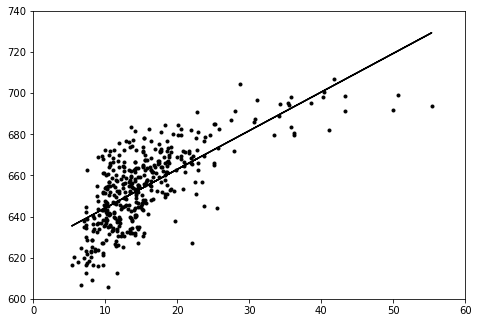

In [91]:
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])
ax.scatter('income', 'score', data=df, color='black', marker='.')
ax.set_ylim(600, 740)
ax.set_xlim(0, 60)

results = smf.ols('score ~ income', data=df).fit()

x = df["income"]
b0 = results.params[0]
b1 = results.params[1]

ax.plot(x, b0 + b1*x, color="black")

plt.show()

It seems that the relationship between district income and test scores is not a straight line. Rather, it is nonlinear. A nonlinear function is a function with a slope that is not constant: The function f(x) is lienar if the slope of f(x) is the same for all values of x, but if the slope depends on the value of x, then f(x) is nonlienar. 

One ways to approximate such a curve mathematically is to model the relationship as a quadratic function. That is, we could model test scores as a function of income and the square of income. 

**Qudratic regression model**

$TestScore_i = \beta_0 + \beta_1Income_i + \beta_2Income^2_i + u_i$

You will see that it is a version of the multiple regression model with two regressors: The first regressors is $Income$, and the second regressor is $Income^2$.

Mechanically, you can create this second regressor by generating a new variable that equals the square of Income. 

Thus, after defining the regressors as $Income$ and $Income^2$, the nonlinear model in the Equation is simply a multiple regression model with two regressors. 

Because the quadratic regression model is a variant of multiple regression, its unknown population coefficients can be estimated and tested using the OLS methods. 

In [96]:
y = nl_b0 + nl_b1*x + nl_b2*np.square(x)

In [97]:
y

0      672.898881
1      641.050679
2      638.465715
3      638.465715
4      638.781615
          ...    
415    683.000393
416    694.329404
417    674.866925
418    641.436508
419    648.834059
Name: income, Length: 420, dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     261.3
Date:                Mon, 08 Feb 2021   Prob (F-statistic):           2.78e-74
Time:                        18:14:04   Log-Likelihood:                -1662.7
No. Observations:                 420   AIC:                             3331.
Df Residuals:                     417   BIC:                             3344.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           607.3017      3.04

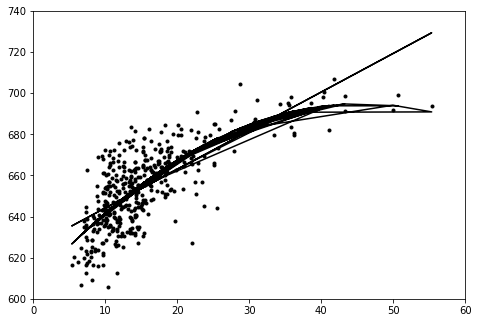

In [98]:
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])
ax.scatter('income', 'score', data=df, color='black', marker='.')
ax.set_ylim(600, 740)
ax.set_xlim(0, 60)

results_1 = smf.ols('score ~ income', data=df).fit()
results_2 = smf.ols('score ~ income + np.square(income)', data=df).fit()


x = df["income"]
b0 = results_1.params[0]
b1 = results_1.params[1]

nl_b0 = results_2.params[0]
nl_b1 = results_2.params[1]
nl_b2 = results_2.params[2]

ax.plot(x, b0 + b1*x, color="black")
ax.plot(x, y, color="black")

print(results_2.summary())
plt.show()

We can go one step beyond this visual comparison and formally test the hypothesis that the relationship between income and test scores is linear against the alternative that it is nonlinear. 

If the relationship is linear, then the regression function is correclty specified as Equation (8.1), except that the regressor $Income^2$ is absent; that is, if the relationship is linear, then Equation (8.1) holds with $\beta_2 = 0$. 

Thus we can test the null hypothesis that the population regression is linear against the alternative that is quadratic by testing the null hypothesis that $\beta_2 = 0$ against the alternative that $\beta_2 \neq 0$.